In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image

### Review of lecture 11

In Lecture 11 we:

- learned about **lambda** functions

- learned how to use **map( )**, **filter( )**, and  **reduce( )** 

- explored the joys of "List comprehensions" (and Dictionary and Set Comprehensions too!)


### In this lecture, we will learn:

- About _recursive functions_ using the Fibonacci sequence and factorials as examples

- New plotting tricks with **matplotlib**

- How to handle errors without crashing:  **exceptions**


### Recursive functions

A _recursive function_ is a function that calls itself. Every recursive function must include a terminating condition, otherwise you will end up with a never ending loop- an _infinite loop_. Every recursive call of the function must move toward the terminating condition: the _base case_. The _base case_ satisfies the terminating condition, so the recursive function is no longer called. 

Here's an example to calculate $n!$, the factorial of $n$

In [6]:
def factorial(n):
    if n == 1: 
        return 1
    else:
        return n * factorial(n-1) 

And we can call it:

In [7]:
factorial(42)

1405006117752879898543142606244511569936384000000000

Whoa!  That's a big number!

### The Fibonacci sequence and recursive functions

Have you ever heard of the 'golden rectangle'?  It is a rectangle with a length to width ratio that is especially pleasing to the eye.  It is no accident that index cards are 3x5 because this is an example of a golden rectangle.   

The golden rectangle is based on the golden ratio, which stems from the work Leonardo Pisano, a.k.a. Fibonacci.  Fibonacci, among other things,  thought deeply about rabbits and their breeding habits. He devised a sequence of numbers that represented the month-to-month growth of the population of rabbits. You begin with a pair of rabbits, one of each sex.  These rabbits start mating when they are one month old and  produce another pair of rabbit babies after a month. The new pair  starts breeding when they are one month old.  Assuming the rabbits never die, Fibonacci asked: How does the population of rabbits grow?  

At the end of the first month, they mate, but there is still only 1 pair.

At the end of the second month the female produces a new pair, so now there are 2 pairs of rabbits.

At the end of the third month, the original female produces a second pair, making 3 pairs in all.

At the end of the fourth month, the original female has produced yet another new pair, the female born two months ago produced her first pair as well, making 5 pairs.

Now imagine that there are $x_ n$ pairs of rabbits after $n$ months. The number of pairs in month $n+1$ will be $x_ n$ plus the number of new pairs born. But new pairs are only born to pairs at least 1 month old, so there will be $x_{n-1}$ new pairs. 

We can write this down mathematically as this:

$x_{n+1} = x_ n + x_{n-1}$. 
    
This is the general rule for generating Fibonacci numbers: add the last two to get the next. 

Here's a visual representation- a Fibonacci spiral where the arm of the spiral grows according to the Fibonacci sequence. Another cool thing is that the rectangles all form golden rectangles with the last two numbers as the sides.

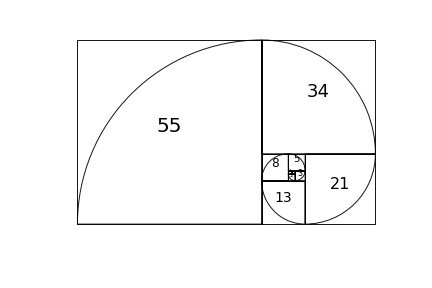

In [10]:
Image(filename='Figures/fib_spiral.jpg',width=500)

You see these Fibonacci spirals everywhere in nature (flowers, shells, your ear, and even hurricanes!). 

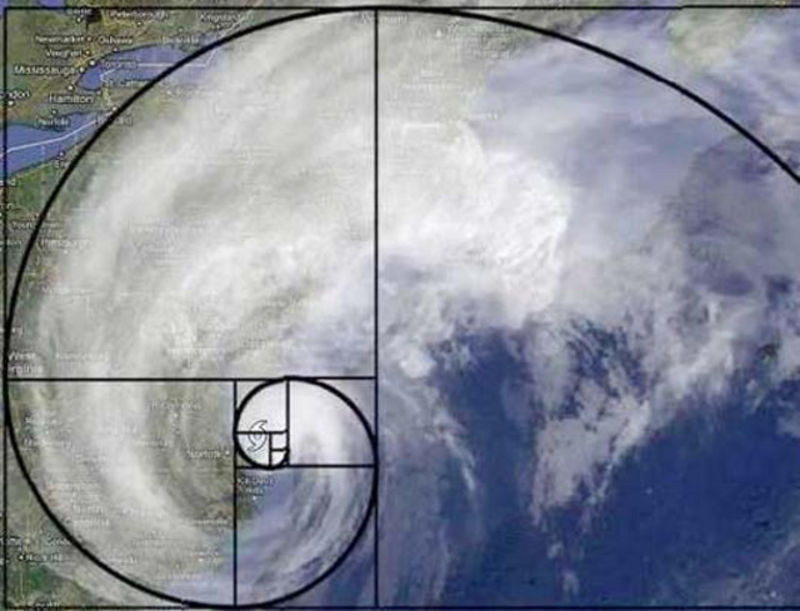

In [11]:
Image(filename='Figures/fibonacci_hurricane.jpg',width=500)

[Figure from https://i.kinja-img.com/gawker-media/image/upload/s--HIRrLp3r--/c_scale,f_auto,fl_progressive,q_80,w_800/18f8hbfn5ag1yjpg.jpg]. 

In this lesson, we'll learn how to create the Fibonacci spiral.

First, we need to generate the Fibonacci sequence. 

Here is an example of a _recursive function_: 

In [12]:
def fib(n):
    """
    returns the fibonacci number for each n
    """
    #the base case occurs when the number of months is less than 1
    if n < 1:
        return n+1
    else:
        return fib(n-1) + fib(n-2) # the function calls itself!
    
    
    
# n is the month and fib(n) is the number of pairs at the beginning of each month
for n in range(13):  # figure out how many rabbit pairs at the end of a year
    print ("month: ",n, "pairs: ",fib(n))

month:  0 pairs:  1
month:  1 pairs:  1
month:  2 pairs:  2
month:  3 pairs:  3
month:  4 pairs:  5
month:  5 pairs:  8
month:  6 pairs:  13
month:  7 pairs:  21
month:  8 pairs:  34
month:  9 pairs:  55
month:  10 pairs:  89
month:  11 pairs:  144
month:  12 pairs:  233


So, now you know - 233 pairs of rabbits.  yum.  

This recursive method works and it looks like a mathematical definition, but it's slow.  If you want a faster method, that doesn't involve recursion, you can use _iteration_.

In [13]:
def fibi(n):
    a, b = 0,1 
    for month in range(n): # step through n iterations
        a, b = b, a + b   
        print ('month: ',month, 'a,b: ',a,b, 'pairs: ', a)
        # a is assigned to b while b is assigned to the sum of the last two numbers a+b
    return a
fibi(13)

month:  0 a,b:  1 1 pairs:  1
month:  1 a,b:  1 2 pairs:  1
month:  2 a,b:  2 3 pairs:  2
month:  3 a,b:  3 5 pairs:  3
month:  4 a,b:  5 8 pairs:  5
month:  5 a,b:  8 13 pairs:  8
month:  6 a,b:  13 21 pairs:  13
month:  7 a,b:  21 34 pairs:  21
month:  8 a,b:  34 55 pairs:  34
month:  9 a,b:  55 89 pairs:  55
month:  10 a,b:  89 144 pairs:  89
month:  11 a,b:  144 233 pairs:  144
month:  12 a,b:  233 377 pairs:  233


233

Now, let's use the Fibonnaci sequence to make the Fibonnaci spiral. We'll need a series of arcs with increasing radii along with some rectangles and text that grows along with the radii.  To help us, we can use a useful module in **matplotlib**: the **patches** module.  Of particular use is the **patches.Wedge** class.   Here we'll use **help( )** to get us started.  

In [14]:
import matplotlib.patches as mpatches # import patches as mpatches
help(mpatches.Wedge)

Help on class Wedge in module matplotlib.patches:

class Wedge(Patch)
 |  Wedge shaped patch.
 |  
 |  Method resolution order:
 |      Wedge
 |      Patch
 |      matplotlib.artist.Artist
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, center, r, theta1, theta2, width=None, **kwargs)
 |      Draw a wedge centered at *x*, *y* center with radius *r* that
 |      sweeps *theta1* to *theta2* (in degrees).  If *width* is given,
 |      then a partial wedge is drawn from inner radius *r* - *width*
 |      to outer radius *r*.
 |      
 |      Valid kwargs are:
 |      
 |        agg_filter: unknown
 |        alpha: float or None 
 |        animated: [True | False] 
 |        antialiased or aa: [True | False]  or None for default 
 |        capstyle: ['butt' | 'round' | 'projecting'] 
 |        clip_box: a :class:`matplotlib.transforms.Bbox` instance 
 |        clip_on: [True | False] 
 |        clip_path: [ (:class:`~matplotlib.path.Path`, :class:`~matplotlib.

  So to draw a "wedge", we make an _instance_ of the **Wedge** class (e.g., **wedgie**) with the required parameters: **center**, which is a tuple with the coordinates of the origin of the wedge **(x,y)**,  a radius, **r** and two angles that specify the sweep of the wedge from one angle (**theta1**) to a second angle (**theta2**).  The value for **r** in our case  is given by the Fibonacci sequence.  **theta1** and **theta2** always sweep out 90 degrees in our case,  starting at 0 and progressing around the clock by 90 degree intervals.  


In [15]:
center,r,theta1,theta2=(0,0),1,0,90
wedgie = mpatches.Wedge(center,r, theta1,theta2)
type(wedgie)

matplotlib.patches.Wedge

**wedgie** is an _instance_ of the **Wedge** class. To display **wedgie**, we need to create an _instance_ of a plot object and add the **patch** to the plot.  This sounds complicated and it is, but we can take it step by step.  

But first, a new **matplotlib** trick:  **plt.subplots( )**.  


We'll employ  **plt.subplots( )** to create our Fibonacci diagram.  The class definition  **plt.subplots( )** returns two closely related objects usually called  **fig** and **ax**.  **fig** is the instance of a **Figure** object and **ax** is an **AxesSubplot** object that has  many useful methods,  one of which (**ax.add_patch( )**) allows us to add the **Wedge** object **wedgie**.


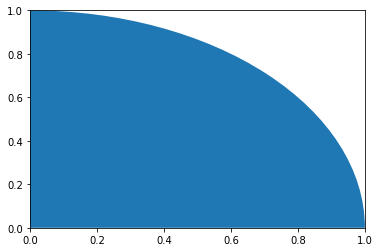

In [16]:
fig,ax = plt.subplots() # make fig and ax objects
ax.add_patch(wedgie); # add the wedgie patch to the ax object

In [25]:
type(fig)

matplotlib.figure.Figure

Nice, but, the axes are not equal by default and we really don't want the tickmarks.  No problem! We can use **plt.axis( )** method which takes **'equal'** and **'off'** as arguments and makes the plot have equal axes that are invisible.  

Also, I really want white wedges, so I can use the keyword argument **facecolor='white'**.  

In [26]:
type(ax)

matplotlib.axes._subplots.AxesSubplot

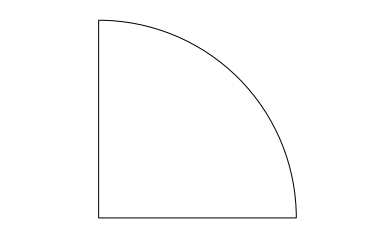

In [17]:
#remake wedgie that is white with black edges
wedgie=mpatches.Wedge(center,r, theta1,theta2, facecolor="white", edgecolor="black")
fig,ax = plt.subplots() # make fig and ax objects
ax.add_patch(wedgie)
plt.axis('equal')
plt.axis('off');

Cool.  That worked!  

Now we need a second type of patch that makes rectangles. For this, we will use  the **Rectangle** class from **mpatches**.



In [18]:
help(mpatches.Rectangle)

Help on class Rectangle in module matplotlib.patches:

class Rectangle(Patch)
 |  Draw a rectangle with lower left at *xy* = (*x*, *y*) with
 |  specified *width*, *height* and rotation *angle*.
 |  
 |  Method resolution order:
 |      Rectangle
 |      Patch
 |      matplotlib.artist.Artist
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, xy, width, height, angle=0.0, **kwargs)
 |            *angle*
 |              rotation in degrees (anti-clockwise)
 |      
 |            *fill* is a boolean indicating whether to fill the rectangle
 |      
 |            Valid kwargs are:
 |              agg_filter: unknown
 |      alpha: float or None 
 |      animated: [True | False] 
 |      antialiased or aa: [True | False]  or None for default 
 |      capstyle: ['butt' | 'round' | 'projecting'] 
 |      clip_box: a :class:`matplotlib.transforms.Bbox` instance 
 |      clip_on: [True | False] 
 |      clip_path: [ (:class:`~matplotlib.path.Path`, :class:`~matplotl

We see that the **Rectangle** makes a rectangle with the lower left corner set at **(x,y)** and with a specified width and height (here the fibonacci numbers).



And here we put it all together.....

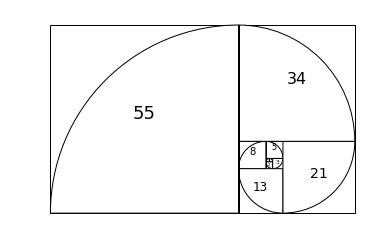

In [19]:
fig,ax = plt.subplots() # make fig and ax objects
# initilize the xy array used for setting the origins of subsequent wedges.
xy = np.array([0, 0]) # our initial lower left corner of the rectangles. 
c = xy # our first origin (or center) for the wedges
i=1 # a counter to keep track of which wedge we are on. 
thetas = np.array([270, 0]) # initialize our thetas. 
for j in range(10): # walk through the fibonacci sequence starting with 1.
    thetas += 90 # increment thetas by 90
    thetas %= 360 # make sure it stays between 0 and 360 using modulo
    if i == 5: i=1 # start over with 1
    if i==1: # first in the sequence around the clock-face
        xy = xy + [ -fib(j-2)    , fib(j-1) ] # increment xy by  two fib numbers
        c = c + [ -fib(j-2), 0         ] # increment wedge center
    elif i==2: # second part
        xy = xy + [ -fib(j)      , -fib(j-2)]
        c = c + [0         , -fib(j-2) ] 
    elif i==3: # third part
        xy = xy + [ 0            , -fib(j)  ]
        c = c + [ fib(j-2) , 0         ]
    elif i==4: # last part
        xy = xy + [ fib(j-1)     , 0        ]
        c = c + [ 0        , fib(j-2)  ]
        

    # Add a rectangle
    rect = mpatches.Rectangle((xy[0],xy[1]), fib(j), fib(j),\
                                facecolor='white', edgecolor="black") # make a square

    ax.add_patch(rect)

    # Add a wedge
    wedge = mpatches.Wedge((c[0],c[1]), fib(j), thetas[0] , thetas[1],\
                           facecolor='white', edgecolor="black") # make a wedge
    ax.add_patch(wedge)

    # put on some text with the fib number getting progressively larger
    plt.text(xy[0]+0.5*fib(j), xy[1]+0.5*fib(j), str(fib(j)), ha="center", size=j*2)
    i+=1 # increment the counter
plt.axis('equal') # make the axes equal - otherwise the default will distort them
plt.axis('off'); # take the annoying axes off altogether.  

### Exceptions

We still haven't mentioned how to handle errors; how should your code handle problems? Should it notify the user? Stop working entirely? Ignore the error and continue? You can control how your functions and any program responds to errors, by catching _exceptions_ (errors) and handling them however you choose. 

Have you noticed that whenever you write improper code, the error type is defined? For example, the cell below throws a **NameError** because we haven't defined the variable **abcdef**

In [20]:
print (abcdef)
print ("complete")


NameError: name 'abcdef' is not defined

The error crashes the code and prevents any of the following commands from executing. We could catch this _exception_ and allow the program to continue. The syntax for exceptions is as follows:

**try:** 
    
    statement 
    
**except (** ExceptionType**):** 

    statement. 

The first statement is attempted. If that statement throws an _exception_ and the _exception_ is included in **ExceptionType**, then the second statement is executed and the program continues. 

Here's our original example, except this time, we'll catch any  **NameError** exceptions:

In [3]:
try:
    print (abcdef)
except(NameError):
    print ('This variable does not exist')

print ("See I didn't crash!  I just told you what went wrong!")

This variable does not exist
See I didn't crash!  I just told you what went wrong!


You can handle the error however you'd like and you may catch any number of errors.  The most common errors are: 

**KeyError**:	Raised when the specified key is not found in the dictionary.

**NameError**:	Raised when an identifier is not found in the local or global namespace 

**TypeError**:	Raised when an operation or function is attempted that is invalid for the specified data type.

**ZeroDivisonError**: Raised when division or modulo by zero takes place for 
all numeric types.

**ValueError**:	Raised when the built-in function for a data type has the valid type of arguments, but the arguments have invalid values specified.

To learn what type of error occured, the error object is called **Exception** and you can print that and/or Exception.\_\_class\_\_.\_\_name\_\_  

In [22]:
try:
    print (abcdef)
except Exception as inst: # call the Exception instance inst
    #print (Exception.__class__.__name__)
    print (type(inst)) # print the type of Exception
    print (inst.args) # print any arguments of the instance
    print (inst) # print out the error message


<class 'NameError'>
("name 'abcdef' is not defined",)
name 'abcdef' is not defined


These messages give you a clue  how to fix the problem (in this case, by defining **abcdef**).     These clues can be used for various debugging tricks like what to do for different types of errors.  

In [23]:
try:
    print (abcdef)
except KeyError:
    print ('I could do one thing here')
except NameError: 
    print ('I could do something else here')

I could do something else here


For more information about Exceptions:

https://docs.python.org/3/tutorial/errors.html

### Assignment #4
Create a new notebook with the name format: Lastname_HomeworkNumber.  For example, **Asefaw_4**

Create a markdown block in which you will describe what the notebook does. 

1. The  equations for an ellipse are:  
> x =a cos( $\theta$ )   ,            y=b sin( $\theta$ ) 
<br>$a$ is the major radius 
<br>$b$ is the minor radius 
<br>$\theta$ is the angle 
    
    a.  Write a **lambda function** that returns $x$ and $y$ given $a$, $b$, and $\theta$.  Assume that theta goes from 0 to 360. Remember that trig functions assume the arguments are in radians
    <br>b. Plot your ellipse using **matplotlib.pyplot**  (imported as **plt**). Use the **%matplotlib inline** magic command
<br><br>
2. Write a **lambda function** that returns the square of an input parameter $x$
    <br>a.  Use **map( )** to generate a list of squares for a sequence with 10 values
    <br>b.  Use **filter( )** and the lambda function to generate a list of squares that are between 5 and 50.
    <br>c.  Use a **list comprehension** to generate the same list with only one line of code.
<br><br>
3. Create a **Class**, it should include at least 3 **attributes** and 3 **methods**. Be creative! Here are a few possibilities- Card, Deck, Planet, Phone Contact, Ocean, Student, Cellphone, Dog, Car
    <br>a. Save your class in a **module**, import the module into your notebook
    <br>b. Create 3 **instances** of your class, change the value of at least one attribute for one instance of your class 
    <br>c. Call all three of your methods-  you can use any of the instances of your class



Your code must be fully commented.  

Turn in your notebook on the tritoned.ucsd.edu website BEFORE the start of class next Friday. 

You will recieve a "zero" if the assignment is late,  copied, or missing comments.  If the degree of copying is serious enough, you WILL be reported, so just don't do it.  

If you have trouble - contact the TA or the instructor - we are here to help!  As usual, come to the Discussion session for sage advice.  